# [Introduction to Data Science: A Comp-Math-Stat Approach](http://datascience-intro.github.io/1MS041-2021/)    
## 1MS041, 2021 
&copy;2021 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# 14. Supervised Learning & what is machine learning?

## Topics

* Supervised Learning
* Probabilistic viewpoint of machine learning
* Logistic regression
* Measuring model performance
* Multiple class logistic regression

Let’s start by talking about a few examples of supervised learning problems. Suppose we have a dataset giving the living areas and prices of 47 houses from Portland, Oregon:

In [1]:
import csv

In [2]:
data = []
header = []
with open('data/portland.csv', mode='r') as f:
    reader = csv.reader(f)
    header = tuple(next(reader))
    for row in reader:
        try:
            data.append((int(row[0]),int(row[1]),int(row[2])))
        except e:
            print(e)

In [3]:
print("The data consists of %d observations" % len(data))
print("")
print("%s \t %s \t %s" % header)
for row in data[:5]:
    print("%d \t\t\t\t\t %d \t\t\t %d" % row)

The data consists of 47 observations

Size of the house (in square feet) 	 Number of bedrooms 	 Price of the house
2104 					 3 			 399900
1600 					 3 			 329900
2400 					 3 			 369000
1416 					 2 			 232000
3000 					 4 			 539900


* Lets say that our goal would be to predict the price of the house given the size and the number of bedrooms

In the case of simple linear regression we could set $x$ to be the size in square feet and $y$ to be the price, the goal would then be to find a function $f(x)$ that is close to $y$ in some sense.

In the context of machine learning they often use the following terminology: let $x^{(i)}$ denote the **features**(living area) and let $y^{(i)}$ denote the **target** (price), then a pair $(x^{(i)},y^{(i)}$ would be called a **training example**.

In this terminology they also call the set of observations $\{(x^{(i)},y^{(i)}),\, i=1,\ldots,m\}$ a training set. 

> **In this context the goal is statistical prediction**

> Contrast this with the **statistical estimation** viewpoint of linear regression, where the goal is to estimate the parameters.

Why is this difference, basically it is one of explainability. Estimation is often used as a tool to explain something through its statistical model and the estimated parameters of the model. Lets assume that there is a linear relationship between fat percentage and BMI, but we do not know the parameters. Then by simply taking a few observations and performing a parameter estimation under a given loss, such as the maximum likelihood estimator (MLE), we can do hypothesis tests to check if the parameters are positive or test between different proposed values of said parameters. The goal in statistical machine learning is often one of prediction, and as you will see, the models that are often in use, do not allow us to actually explain anything, although the prediction is also accomplished by first estimating parameters of a model but with the explicit goal of predicting future from past observations.

> In conclusion, in statistical machine learning we are often using weaker model assumptions, but since we are focusing on prediction we do not really have a problem. In contrast, in classical statistical decision problems, the focus is on stronger model assumptions and the goal is to extract more detailed information about the relationships between features and targets to obtain a better explainable understanding of the underlying data generating process.

> Think of the name, machine learning. From this you get that the focus has to be the behavior of the machine (prediction).

It is important to bear in mind that estimation for explainability and estimation for predictability are both formally statistical decision problems. Here, we take such a mathematical approach.

## Supervised learning

The schematic overview of supervised learning is the picture below

<img src="images/LearningAlgorithm.png" width=30%>

### What we will cover in this and coming lectures

* How do we arrive at different learning algorithms and what are the common ones?
* How do we make sure that the learning algorithm is any good?
* What if it is not so good, what can we do then?
* Are there any guarantees on how good an algorithm will perform (like in linear regression)?

## Probabilistic viewpoint of machine learning

> To describe the supervised learning problem slightly more formally, our goal is, given a training set, to learn a function $h : \mathcal{X} \to \mathcal{Y}$ so that $h(x)$ is a “good” predictor for the corresponding value of $y$. For historical reasons, this function h is called a hypothesis in the machine learning community and should not be confused with hypothesis testing from classical statistical community. The class of all functions that we are searching in is called the hypothesis class in this nomenclature (denoted $\mathcal{H}$).

The process of learning can for many supervised algorithms be written as follows:
$$
    \arg\min_{h \in \mathcal{H}} \sum_{i=1}^m L(h(x^{(i)}),y^{(i)})
$$
where $L$ is a so called **loss** function or **cost** function, we will see how this loss function in most cases is the log-Likelihood for some underlying model. In order to describe this process we need to dig a bit deeper into the concept of regression:

In the case of linear regression we assumed that the regression function $r(x)$
$$
    r(x) = E(Y | X=x) = \int y \, f(y|x) dy
$$
was linear, i.e. $r(x) = \beta_0 + \beta_1 x$, furthermore we assumed that
$$
    V(Y | X=x)=\sigma^2, \quad \text{independent of $X$}
$$
We assumed that
$$
    \boxed{\displaystyle{\epsilon_i | X_i \sim Normal(0,\sigma^2) \quad \text{ i.e., }\quad Y_i|X_i \sim Normal(\mu_i,\sigma^2), \quad \text{ where } \quad \mu_i = \beta_0+\beta_1 X_i }}
$$
and from this we got that the conditional likelihood is
$$
\boxed{
l(\beta_0,\beta_1,\sigma) \quad =\quad \displaystyle{-n \log(\sigma) -\frac{1}{2 \sigma^2} \sum_{i=1}^n\left(Y_i-\mu_i\right)^2 }
}
$$

If we in this case denote $L(a,b) = (a-b)^2$ then we can now phrase the linear regression problem as
$$
    \arg\min_{h \in \mathcal{H}} \sum_{i=1}^m L(h(x^{(i)}),y^{(i)})
$$

> Note the shift in notation and how we deal with random versus observed. In the machine learning community they often work with "observed values" and just plug in the values. But the idea from which all of this originates and if one wants to make statistical machine learning rigorous, we need to use our terminology with random variables and consider "data" as being a set of random variables formally made precise by an underlying probability triple.

#### The Portland house price example using Sci-kit learn

In [4]:
def showURL(url, ht=500):
    """Return an IFrame of the url to show in notebook with height ht"""
    from IPython.display import IFrame
    return IFrame(url, width='95%', height=ht) 
showURL('https://scikit-learn.org/stable/',600)

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [6]:
#?LinearRegression

In order to use sci-kit learns framework to "train" a linear regression model we will first have to prepare the data in the way that it expects. The format is as follows

* X -- a numpy array of shape (n_samples,n_features)
* Y -- a numpy array of length n_samples

In [7]:
import numpy as np
X = np.array([row[0] for row in data]).reshape(-1,1) # This since we only have one feature (n_samples,1) is the shape
Y = np.array([row[2] for row in data])

Let's note the shapes of `X` and `Y` now.

In [8]:
X.shape

(47, 1)

In [9]:
Y.shape

(47,)

In [10]:
lr.fit(X,Y)

LinearRegression()

This now gives us a fitted model for this particular data, so lets plot it.

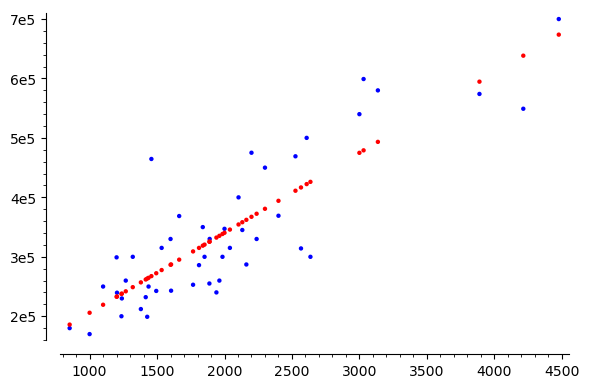

In [11]:
P = points([(x,y) for x,y in zip (X,Y)])
P += points([(x,lr.predict(x.reshape(-1,1))) for x,y in zip (X,Y)],color='red')
show(P)

Ofcourse we could use all available features to make multiple linear regression as follows

In [12]:
import numpy as np
X2 = np.array([(row[0],row[1]) for row in data])
Y = np.array([row[2] for row in data])
lr2 = LinearRegression()
lr2.fit(X2,Y)

LinearRegression()

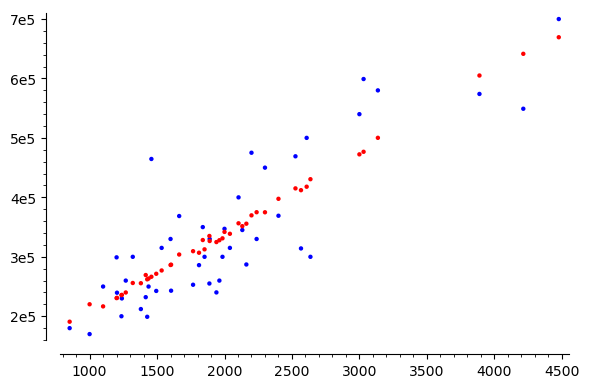

In [13]:
P = points([(x[0],y) for x,y in zip (X2,Y)]) # x[0] is size of the house
P += points([(x[0],lr2.predict(x.reshape(1,-1))) for x,y in zip (X2,Y)],color='red')
show(P)

As we can see here, since the x-axis is size and the y axis is price we have an underlying variable which is number of bedrooms the line is not straight.

Let's also plot the number of bedrooms `x[1]` against the price (y-axis) next to appreciate the other discrete feature.

But remember, this is a linear model so if we consider the full 3-d space the predictions would be on a plane instead of a line.

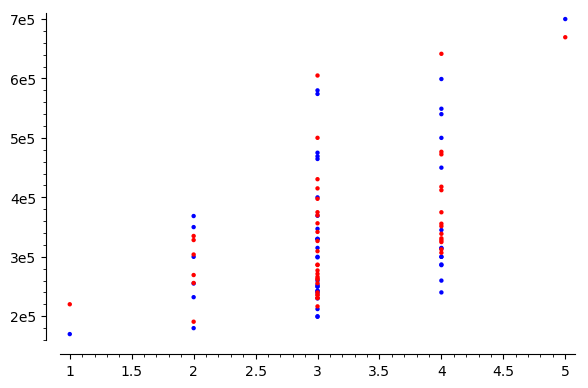

In [14]:
P = points([(x[1],y) for x,y in zip (X2,Y)]) # x[1] is number of bedrooms
P += points([(x[1],lr2.predict(x.reshape(1,-1))) for x,y in zip (X2,Y)],color='red')
show(P)

## Other models

Now that we have seen linear regression being viewed as a machine learning model through the concept of MLE, we can actually derive most other models that are being used in the machine learning world, but in order to describe the next model, let us first consider another example problem. It is the classical wine quality dataset.

This dataset is actually built into sklearn and we can load it as follows

In [15]:
import ssl # this hack of unverified ssl context is not recommended and unnecessary if you do: 'sage --pip install certifi' in your bash shell after installing SageMath
ssl._create_default_https_context = ssl._create_unverified_context

import sklearn.datasets as datasets
X, Y = datasets.load_wine(return_X_y=True)

<div class="section" id="wine-recognition-dataset">
<span id="wine-dataset"></span><h3>Wine recognition dataset<a class="headerlink" href="#wine-recognition-dataset" title="Permalink to this headline">¶</a></h3>
<p><strong>Data Set Characteristics:</strong></p>
<blockquote>
<div><dl class="field-list simple">
<dt class="field-odd">Number of Instances</dt>
<dd class="field-odd"><p>178 (50 in each of three classes)</p>
</dd>
<dt class="field-even">Number of Attributes</dt>
<dd class="field-even"><p>13 numeric, predictive attributes and the class</p>
</dd>
<dt class="field-odd">Attribute Information</dt>
<dd class="field-odd"><ul class="simple">
<li><p>Alcohol</p></li>
<li><p>Malic acid</p></li>
<li><p>Ash</p></li>
<li><p>Alcalinity of ash</p></li>
<li><p>Magnesium</p></li>
<li><p>Total phenols</p></li>
<li><p>Flavanoids</p></li>
<li><p>Nonflavanoid phenols</p></li>
<li><p>Proanthocyanins</p></li>
<li><p>Color intensity</p></li>
<li><p>Hue</p></li>
<li><p>OD280/OD315 of diluted wines</p></li>
<li><p>Proline</p></li>
</ul>
</dd>
</dl>
<ul class="simple">
<li><dl class="simple">
<dt>class:</dt><dd><ul>
<li><p>class_0</p></li>
<li><p>class_1</p></li>
<li><p>class_2</p></li>
</ul>
</dd>
</dl>
</li>
</ul>

The wine have been grown by three different cultivators in Italy, the goal is to predict which cultivator actually made the wine base on what we can measure.

We will simplify this problem by making sure that we only have two possible classes, lets try to differentiate between `class_2` and the other cultivators. Lets convert our data so that this is the case

In [16]:
Y_binary = (Y > 1)*1
Y_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [17]:
X.shape # 178 samples and 13 features

(178, 13)

In [18]:
Y_binary.shape # 178 samples

(178,)

Thus we know that $Y$ is binary, it can only take 1 and 0. Lets apply the ideas of linear regression but we make some changes, i.e. let us again assume that
$$
    r(x) = \beta_0 + \beta_1 x
$$
and remember $r(x) = E(Y | X=x)$, and again we write
$$
    Y \mid X_i \sim \text{Bernoulli}(\theta(X_i)), \text{ where $\theta(X_i) = \beta_0 + \beta_1 X_i$}
$$

Thus the conditional likelihood (see `12.ipynb`) of some observations $(x^{(i)},y^{(i)})$, $i = 1,\ldots, m$ is given by
$$
    L(\beta_0,\beta_1) = \prod_{i=1}^m \theta(x^{(i)})^{y^{(i)}} (1-\theta(x^{(i)}))^{1-y^{(i)}}
$$

Take the logarithm to get the log-likelihood and we get
$$
    l(\beta_0,\beta_1) = \sum_{i=1}^m y^{(i)} \log(\theta(x^{(i)})) + ((1-y^{(i)}) \log(1-\theta(x^{(i)})))
$$

Lets try to numericall optimize it!

In [19]:
import numpy as np
from scipy import optimize

# define the objective/cost/loss function we want to minimise
def f(x):
    return -np.sum(Y_binary*log(x[0] + x[1]*X[:,0])+(1-Y_binary)*log(1-x[0] - x[1]*X[:,0]))

# multi-dimensional optimisation is syntactically similar to 1D, 
# but we are using Gradient and Hessian information from numerical evaluation of f to 
# iteratively improve the solution along the steepest direction, etc. 
# It 'LBFGS' method you will see in scientific computing
parameter_bounding_box=((0.0001, 0.1), (0.0001, 0.1)) # specify the constraints for each parameter
initial_arguments = np.array([0.0001, 0.0001]) # point in 2D to initialise the minimize algorithm
optimize.minimize(f, initial_arguments, bounds=parameter_bounding_box,) # just call the minimize method!

/ext/sage/sage-9.1/local/lib/python3.7/site-packages/sage/functions/log.py:436: RuntimeWarning: invalid value encountered in log
  return ln(args[0], **kwds)


      fun: nan
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -33829.47056139, -444334.41454999])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 63
      nit: 0
   status: 2
  success: False
        x: array([0.0001, 0.0001])

Hmm.... this does not work so well, play around with the bounds in the above to try to get a feeling for this.

In [20]:
b1, b2 = var('b1 b2')
f = sum([y*log(b1 + b2*x[0]) + (1-y)*log(1-b1-b2*x[0]) for x,y in zip(X,Y_binary)])
plot3d(f(b1,b2),(b1,0.001,0.2),(b2,0.001,0.1), frame=False, color='purple', opacity=0.8,aspect_ratio=[10,10,1])

Graphics3d Object

## Whats the problem?

Well, basically the problem is that our model for $\theta$ does not stay between $[0,1]$. How do we fix that?

Well, one way is to consider the following logistic function $\frac{1}{1+e^{-x}}$

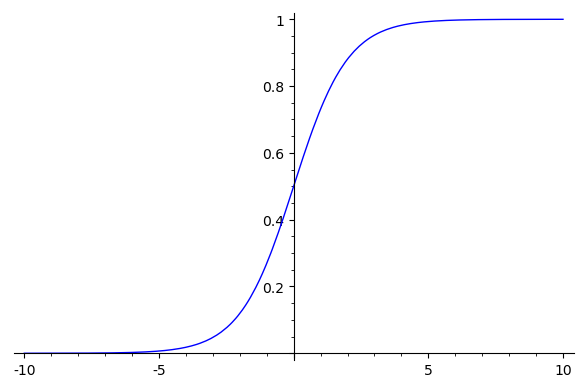

In [21]:
plot(1/(1+e^(-x)),-10,10)

Lets revisit our problem with the following

$$
    Y_i \mid X_i \sim \text{Bernoulli}(\theta(X_i)), \text{ where $\theta(X_i) = G(\beta_0 + \beta_1 X_i)$}
$$
where $G(x) = \frac{1}{1+e^{-x}}$. The conditional likelihood becomes

$$
    l(\beta_0,\beta_1) = \sum_{i=1}^m y^{(i)} \log(\theta(x^{(i)})) + ((1-y^{(i)}) \log(1-\theta(x^{(i)})))
$$
To make this expression simpler and more numerically stable we can simplify a bit by denoting $f(x) = \beta_0 + \beta_1 x$
$$
\left \{
\begin{aligned}
    y &= 1,  &&\log(\theta(x^{(i)})) = \log(1/(1+e^{-f(x^{(i)}})) = -\log(1+e^{-f(x^{(i)}}) \\
    y &= 0,  &&\log(1-\theta(x^{(i)})) = \log(e^{-f(x^{(i)}}/(1+e^{-f(x^{(i)}})) = -\log(1+e^{f(x^{(i)}})
\end{aligned}
\right .
$$

With this simplification we can rewrite our log-Likelihood if we relabel $y=0$ as $y=-1$, which gives
$$
    l(\beta_0,\beta_1) = \sum_{i=1}^m -\log(1+e^{-y^{(i)} f(x^{(i)})})
$$

Now, you might wonder, why the specific form of $G(x)$ other than the fact that it outputs numbers between 0 and 1? To see why this formula is used, consider the log-odds ratio given $X$, i.e.
$$
    \log \left ( \frac{P(Y = 1 | X)}{P(Y = 0 | X)} \right ) = \log \left ( \frac{\theta(X)}{1-\theta(X)} \right ) = \log \left ( \frac{G(f(X))}{1-G(f(X))} \right ) = \log(e^{f(X)}) = f(X) = \beta_0 + \beta_1 X
$$

Thus the logistic regression is linear regression on the log odds ratio.

Let us revisit the problem, but this time we are going to do two things essentially, first we are going to put everything on unit scale (for us this is only to simplify plotting). The unit scale is done using `StandardScaler` which takes each feature in `X` and rescales so that the mean is zero and standard deviation is $1$.

The second thing we are going to do is to consider only one feature, $X$ has $13$ features, I have for your pleasure chosen the feature with index $9$ (most visual).

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
Y1 = 2*Y_binary-1 # Transform into +-1

In [23]:
# Uncomment and run to understand what it does
#?StandardScaler

In the simplest case we have $\beta_0 = 0$ then our loss function looks like

In [24]:
b1, b2 = var('b1 b2')
f = sum([log(1+exp(-y*(b1+b2*x))) for x,y in zip(X_sc[:,9],Y1)])
plot3d(f(b1,b2),(b1,-4,0),(b2,0,4), frame=True, color='purple', opacity=0.8,aspect_ratio=[5,5,1])

Graphics3d Object

In [25]:
import numpy as np
from scipy import optimize

# define the objective/cost/loss function we want to minimise
def f(x):
    return np.sum(np.log(1+np.exp(-Y1*(x[0] + x[1]*X_sc[:,9]))))

# multi-dimensional optimisation is syntactically similar to 1D, 
# but we are using Gradient and Hessian information from numerical evaluation of f to 
# iteratively improve the solution along the steepest direction, etc. 
# It 'LBFGS' method you will see in scientific computing
parameter_bounding_box=((-10, 2), (-10, 2)) # specify the constraints for each parameter
initial_arguments = np.array([0, 0]) # point in 2D to initialise the minimize algorithm
result = optimize.minimize(f, initial_arguments, bounds=parameter_bounding_box,) # just call the minimize method!
result

      fun: 67.32689020081042
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.55271368e-05,  2.13162821e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 30
      nit: 8
   status: 0
  success: True
        x: array([-1.43278954,  1.84018362])

In [26]:
result_func(z) = 1/(1+exp(-result.x[0]-result.x[1]*z))
result_func

z |--> 1/(e^(-1.8401836221193224*z + 1.432789536610928) + 1)

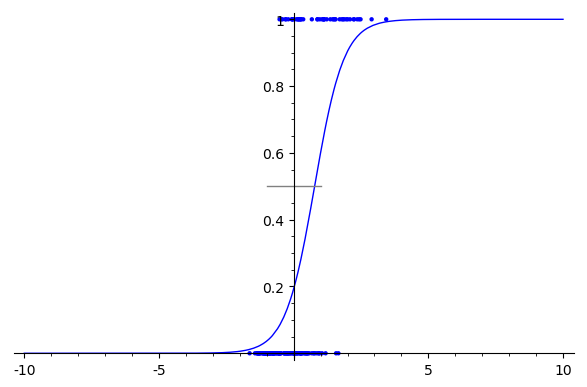

In [27]:
P = points(zip(X_sc[:,9],Y_binary))
P+= plot(result_func,-10,10)
P+= plot(0.5,color='grey')
show(P)

Lets try to do the same thing with the ready made `LogisticRegression` in `sklearn`

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='none')
logreg.fit(X_sc[:,9].reshape(-1,1),Y_binary)

LogisticRegression(penalty='none')

In [29]:
(logreg.coef_,logreg.intercept_)

(array([[1.84018447]]), array([-1.43278738]))

As we can see, we get the same result and it is very easy to write the code.

### Wrap up

The conclusion is that for predicting a numerical value, like the price of a house, we can use a model of normally distributed noise, that is the conditional distribution of the target variable is normal.

However in the case when we have binary target, i.e. like in our wine problem, then its reasonable to assume that the conditional distribution of the target is Bernoulli.

So, they both come from the same place. 
> Goal predict $Y$ based on $X$.
>
> * Assume $Y \mid X=x \sim \mu(\theta(x))$, for some $\mu$ that fits the problem, with parameter $\theta(x)$.
> * Prescibe a model for the parameter $\theta(x)$ it could be linear as in linear regression, logistic function as in the case of logistic regression or it can be something else. IMPORTANT: the model we choose for $\theta(x)$ should only produce values of $\theta(x)$ that is admissible for the distribution $\mu(\theta)$.
> * Derive the log-likelihood
> * Either analytically or numerically find the maximum of the log-likelihood.

## How do we know if our model is any good?

We will illustrate this with an example built upon the Portland data that we saw earlier.

In [33]:
# Just some code copied from 11.ipynb about nonparametric estimation

def makeEMFHidden(myDataList):
    '''Make an empirical mass function from a data list.
    
    Param myDataList, list of data to make emf from.
    Return list of tuples comprising (data value, relative frequency) ordered by data value.'''
    
    sortedUniqueValues = sorted(list(set(myDataList)))
    freqs = [myDataList.count(i) for i in sortedUniqueValues]
    relFreqs = [ZZ(fr)/len(myDataList) for fr in freqs] # use a list comprehension
    
    return list(zip(sortedUniqueValues, relFreqs))
    

from pylab import array

def makeEDFHidden(myDataList, offset=0):
    '''Make an empirical distribution function from a data list.
    
    Param myDataList, list of data to make ecdf from.
    Param offset is an offset to adjust the edf by, used for doing confidence bands.
    Return list of tuples comprising (data value, cumulative relative frequency) ordered by data value.'''
    
    sortedUniqueValues = sorted(list(set(myDataList)))
    freqs = [myDataList.count(i) for i in sortedUniqueValues]
    from pylab import cumsum
    cumFreqs = list(cumsum(freqs)) #
    cumRelFreqs = [ZZ(i)/len(myDataList) for i in cumFreqs] # get cumulative relative frequencies as rationals
    if offset > 0: # an upper band
        cumRelFreqs = [min(i ,1) for i in cumRelFreqs] # use a list comprehension
    if offset < 0: # a lower band
        cumRelFreqs = [max(i, 0) for i in cumFreqs] # use a list comprehension
    return list(zip(sortedUniqueValues, cumRelFreqs))
    
# EPMF plot
def epmfPlot(samples):
    '''Returns an empirical probability mass function plot from samples data.'''
    
    epmf_pairs = makeEMFHidden(samples)
    epmf = point(epmf_pairs, rgbcolor = "blue", pointsize="20")
    for k in epmf_pairs:    # for each tuple in the list
        kkey, kheight = k     # unpack tuple
        epmf += line([(kkey, 0),(kkey, kheight)], rgbcolor="blue", linestyle=":")
    # padding
    epmf += point((0,1), rgbcolor="black", pointsize="0")
    return epmf
    

# ECDF plot
def ecdfPlot(samples):
    '''Returns an empirical probability mass function plot from samples data.'''
    ecdf_pairs = makeEDFHidden(samples)
    ecdf = point(ecdf_pairs, rgbcolor = "red", faceted = false, pointsize="20")
    for k in range(len(ecdf_pairs)):
        x, kheight = ecdf_pairs[k]     # unpack tuple
        previous_x = 0
        previous_height = 0
        if k > 0:
            previous_x, previous_height = ecdf_pairs[k-1] # unpack previous tuple
        ecdf += line([(previous_x, previous_height),(x, previous_height)], rgbcolor="grey")
        ecdf += points((x, previous_height),rgbcolor = "white", faceted = true, pointsize="20")
        ecdf += line([(x, previous_height),(x, kheight)], rgbcolor="grey", linestyle=":")
    # padding
    ecdf += line([(ecdf_pairs[0][0]-0.2, 0),(ecdf_pairs[0][0], 0)], rgbcolor="grey")
    max_index = len(ecdf_pairs)-1
    ecdf += line([(ecdf_pairs[max_index][0], ecdf_pairs[max_index][1]),(ecdf_pairs[max_index][0]+0.2, ecdf_pairs[max_index][1])],rgbcolor="grey")
    return ecdf
    
def calcEpsilon(alphaE, nE):
    '''Return confidence band epsilon calculated from parameters alphaE > 0 and nE > 0.'''
    
    return sqrt(1/(2*nE)*log(2/alphaE))

# ECDF plot given a list of points to plot
def ecdfPointsPlot(listOfPoints, colour='grey', lines_only=False):
    '''Returns an empirical probability mass function plot from a list of points to plot.
    
    Param listOfPoints is the list of points to plot.
    Param colour is used for plotting the lines, defaulting to grey.
    Param lines_only controls wether only lines are plotted (true) or points are added (false, the default value).
    Returns an ecdf plot graphic.'''
    
    ecdfP = point((0,0), pointsize="0")
    if not lines_only: ecdfP = point(listOfPoints, rgbcolor = "red", faceted = false, pointsize="20")
    for k in range(len(listOfPoints)):
        x, kheight = listOfPoints[k]     # unpack tuple
        previous_x = 0
        previous_height = 0
        if k > 0:
            previous_x, previous_height = listOfPoints[k-1] # unpack previous tuple
        ecdfP += line([(previous_x, previous_height),(x, previous_height)], rgbcolor=colour)
        ecdfP += line([(x, previous_height),(x, kheight)], rgbcolor=colour, linestyle=":")
        if not lines_only: 
            ecdfP += points((x, previous_height),rgbcolor = "white", faceted = true, pointsize="20")
            # padding
    max_index = len(listOfPoints)-1
    ecdfP += line([(listOfPoints[0][0]-0.2, 0),(listOfPoints[0][0], 0)], rgbcolor=colour)
    ecdfP += line([(listOfPoints[max_index][0], listOfPoints[max_index][1]),(listOfPoints[max_index][0]+0.2,\
                                                                listOfPoints[max_index][1])],rgbcolor=colour)
    return ecdfP

def makeEDFPoints(myDataList, offset=0):
    '''Make a list empirical distribution plotting points from from a data list.
    
    Param myDataList, list of data to make ecdf from.
    Param offset is an offset to adjust the edf by, used for doing confidence bands.
    Return list of tuples comprising (data value, cumulative relative frequency(with offset)) 
    ordered by data value.'''
    
    sortedUniqueValues = sorted(list(set(myDataList)))
    freqs = [myDataList.count(i) for i in sortedUniqueValues]
    from pylab import cumsum
    cumFreqs = list(cumsum(freqs)) 
    cumRelFreqs = [ZZ(i)/len(myDataList) for i in cumFreqs] # get cumulative relative frequencies as rationals
    if offset > 0: # an upper band
        cumRelFreqs = [min(i+offset ,1) for i in cumRelFreqs]
    if offset < 0: # a lower band
        cumRelFreqs = [max(i+offset, 0) for i in cumRelFreqs] 
    return list(zip(sortedUniqueValues, cumRelFreqs))

The goal we have in mind is to get some estimate as to how good our model actually is at fitting the data. We will take a different approach from the traditional ideas of Fisher information and MLE estimation, and instead adopt a nonparametric approach. What we do is in the simplest case, the following:

* Take your data and randomly subdivide it into two parts, in the machine learning community these are called train and test sets.
* Train the model on the training data and test it on the test data.

To illustrate what we mean let us jump into some code that splits the data into two parts randomly.

In [34]:
def randomSplit(X,Y,proportion=0.7):
    '''Randomly splits the pairs X,Y into two disjoint sets
    with proportionality that the first set corresponds to proprtion and the
    second is 1-proportion
    '''
    assert type(X) == np.ndarray
    assert len(X.shape) == 2
    assert len(Y.shape) == 1
    assert X.shape[0] == Y.shape[0]
    numSamples = X.shape[0]
    numSamplesFirstPart = int(numSamples*proportion)
    #numSamplesSecondPart = numSamples - numSamplesFirstPart
    indexes = np.arange(numSamples)
    np.random.shuffle(indexes)
    firstPartIndexes = indexes[:numSamplesFirstPart]
    secondPartIndexes = indexes[numSamplesFirstPart:]
    return X[firstPartIndexes],Y[firstPartIndexes],X[secondPartIndexes],Y[secondPartIndexes]

In [35]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import sklearn.datasets as datasets
california_housing = datasets.fetch_california_housing()
print(california_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [36]:
X = california_housing.data
Y = california_housing.target
X_train,Y_train,X_test,Y_test = randomSplit(X,Y,proportion=0.9)

`X_train,Y_train` will now be different from `X_test,Y_test`. What this means is that if we assume that the original data is IID we can consider the two samples independent. So, let us train a simple linear regression model

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [38]:
residual = Y_test-lr.predict(X_test)

In [39]:
len(residual)

2064

In [40]:
def plotResidualECDFBand(residuals,alpha=0.05):
    if type(residuals) == np.ndarray:
        residual = residuals.tolist()
    elif type(residuals) == list:
        residual = residuals
    
    residualPoints = makeEDFPoints(residual)
    p = ecdfPointsPlot(residualPoints,lines_only=True)
    epResidual = calcEpsilon(alpha,len(residual))
    residualPointsLower = makeEDFPoints(residual, offset=-epResidual)
    residualPointsUpper = makeEDFPoints(residual, offset=epResidual)
    p+=ecdfPointsPlot(residualPointsLower,lines_only=True)
    p+=ecdfPointsPlot(residualPointsUpper,lines_only=True)
    show(p)

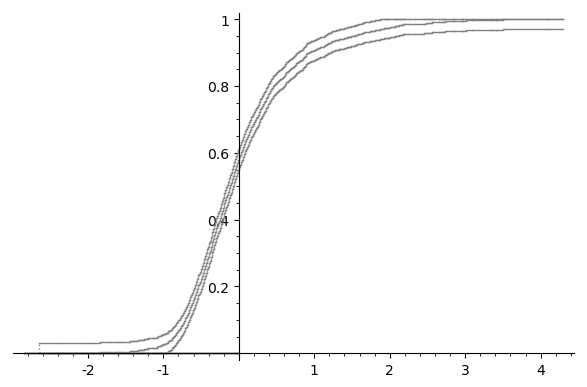

In [41]:
plotResidualECDFBand(residual)

## Bootstrap estimation of the mean of the residual

We can perform a plug-in estimation of the mean of the residual and approximate its confidence interval using the idea of the Bootstrap

In [42]:
bootstrap_means = [np.mean(np.random.choice(residual,size=len(residual),replace=True)) for i in range(10000)]

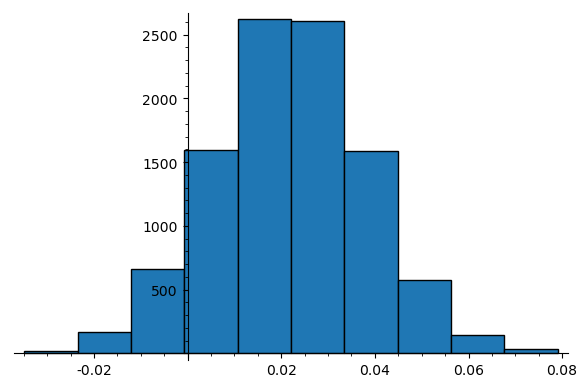

In [43]:
histogram(bootstrap_means)

In [44]:
lower95BootstrapCIForMean = np.percentile(bootstrap_means,2.5)
upper95BootstrapCIForMean = np.percentile(bootstrap_means,97.5)

print ("The inner 95% percentile based Confidence Interval for the mean = ")
print ("[ "+str(lower95BootstrapCIForMean) + " , " + str(upper95BootstrapCIForMean) +" ]")

The inner 95% percentile based Confidence Interval for the mean = 
[ -0.010323753406153989 , 0.05347325551326631 ]


### Bootstrap estimation of the variance of the residual

We can do the same for the variance of the residual

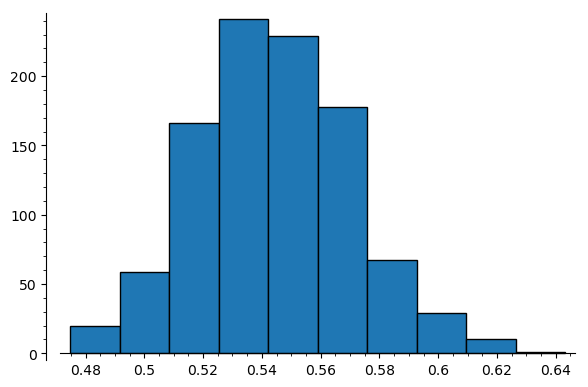

The inner 95% percentile based Confidence Interval for the variance = 
[ 0.4947251198872258 , 0.6000747572077545 ]


In [45]:
bootstrap_vars = [np.var(np.random.choice(residual,size=len(residual),replace=True)) for i in range(1000)]
show(histogram(bootstrap_vars))
lower95BootstrapCIForVar = np.percentile(bootstrap_vars,2.5)
upper95BootstrapCIForVar = np.percentile(bootstrap_vars,97.5)

print ("The inner 95% percentile based Confidence Interval for the variance = ")
print ("[ "+str(lower95BootstrapCIForVar) + " , " + str(upper95BootstrapCIForVar) +" ]")

### Measuring how good a model is (explained variance)

The **coefficient of determination** or **explained variance** is defined as follows:

$$R^2 = 1- \frac{MSE}{Var(y)}$$

MSE - Mean Squared Error and is the sum of squares of the residual

Let us estimate this using Bootstrapping

In [46]:
RsquaredBoot = []
for i in range(1000):
    indices = np.random.choice(np.arange(len(residual)),size=len(residual),replace=True)
    res_boot = residual[indices]
    residual_squares = np.mean(res_boot^2)
    y_boot = Y_train[indices]
    y_boot_variance = np.var(y_boot)
    RsquaredBoot.append(1-residual_squares/y_boot_variance)

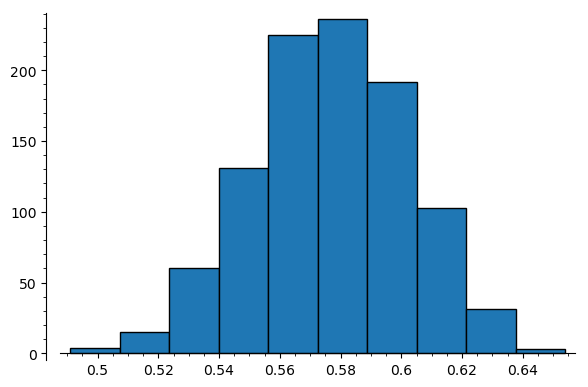

In [47]:
histogram(RsquaredBoot)

In [48]:
lower95BootstrapCIForVar = np.percentile(RsquaredBoot,2.5)
upper95BootstrapCIForVar = np.percentile(RsquaredBoot,97.5)
print ("The inner 95% percentile based Confidence Interval for R^2 = ")
print ("[ "+str(lower95BootstrapCIForVar) + " , " + str(upper95BootstrapCIForVar) +" ]")

The inner 95% percentile based Confidence Interval for R^2 = 
[ 0.5271436909419323 , 0.6248155291456209 ]


## More interesting example

In our derivation, we might as well have considered multiple features, like multiple linear regression. The extension is the same, now $\beta_0$ is still a number, but $\beta_1,x$ are vectors in $\mathbb{R}^d$ where $d$ is the number of features, $f(x) = \beta_0 + \beta_1 \cdot x$. With this simple extension we can consider a more interesting example. Consider a dataset of 8x8 bitmaps representing handwritten digits, this can look like follows

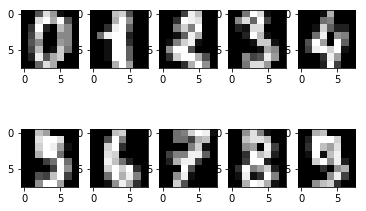

In [49]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
fig, ax = plt.subplots(2,5)
plt.gray()
for i in range(10):
    row = floor(i/5)
    column = i % 5
    ax[row,column].imshow(digits['data'][i,:].reshape(8,8))

Lets first build a classifier that distinguishes the  top row from the bottom row, so let us construct the target for this problem

In [50]:
target = (digits['target'] >= 5)*1

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(digits['data'],target)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [53]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(sc.transform(X_train),Y_train)

LogisticRegression()

In [54]:
logReg.score(sc.transform(X_train),Y_train)

0.9101707498144024

We can with the same methods as before construct confidence bands around the residual ECDF using the DKW inequality:

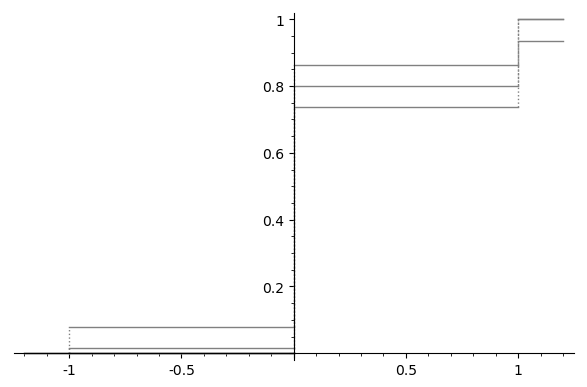

In [55]:
plotResidualECDFBand(logReg.predict(X_test)-Y_test)

## Multiple classes

The above example naturally leads us to wanting to model multiple outputs. That is, instead of the Bernoulli we could consider DeMoivre$(p_1,\ldots,p_m)$ for $m$ classes. What we want is the following

$$
    \sum_{i=1}^m p_i = 1
$$

$Y_i \mid X_i \sim \text{DeMoivre}(\theta(X_i))$, where $\theta \in [0,1]^m$. But how do we find a good model for $\theta$?

Let us model each log-ratio as a linear function
$$
    \log\left ( \frac{P(Y = i \mid X)}{P(Y = m \mid X)}\right ) = w_{i} \cdot x, \quad \forall i=1,\ldots,m-1
$$
now fix $i$ and consider

$$
    P(Y = i \mid X) = e^{w_i \cdot x} P(Y = m \mid X), \quad \forall i=1,\ldots, m-1
$$
Now
$$
    \sum P(Y = i \mid X) = 1
$$
Hence
$$
    P(Y = m \mid X) = 1-\sum_{i=1}^{m-1} P(Y = i \mid X) = 1-\sum_{i=1}^{m-1} e^{w_i \cdot x} P(Y = m \mid X)
$$
Hence
$$
    P(Y = m \mid X) = \frac{1}{1+\sum_{i=1}^{m-1} e^{w_i \cdot x}}
$$

Plugging back in gives
$$
    P(Y = i \mid X) = \frac{e^{w_i \cdot x}}{1+\sum_{j=1}^{m-1} e^{w_j \cdot k}}
$$

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(digits['data'],digits.target)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [58]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(sc.transform(X_train),Y_train)

LogisticRegression()

In [59]:
logReg.score(sc.transform(X_train),Y_train)

0.9985152190051967

We can with the same methods as before construct confidence bands around the residual ECDF using the DKW inequality:

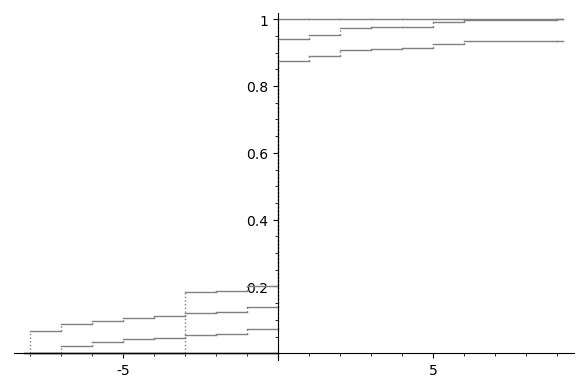

In [60]:
plotResidualECDFBand(logReg.predict(X_test)-Y_test)